Some Markdown text maybe
# lets see

Enter the player's name: lebron james
Selected Player:
Player: LeBron James
Team: LAL
Points: 1590
Assists: 375
Rebounds: 457

Top 3 Similar Players:
Player 1:
Name: Dejounte Murray
Team: ATL
Points: 1515
Assists: 448
Rebounds: 389
Difference: 124

Player 2:
Name: Stephen Curry
Team: GSW
Points: 1648
Assists: 352
Rebounds: 341
Difference: 131

Player 3:
Name: CJ McCollum
Team: NOP
Points: 1568
Assists: 429
Rebounds: 328
Difference: 141



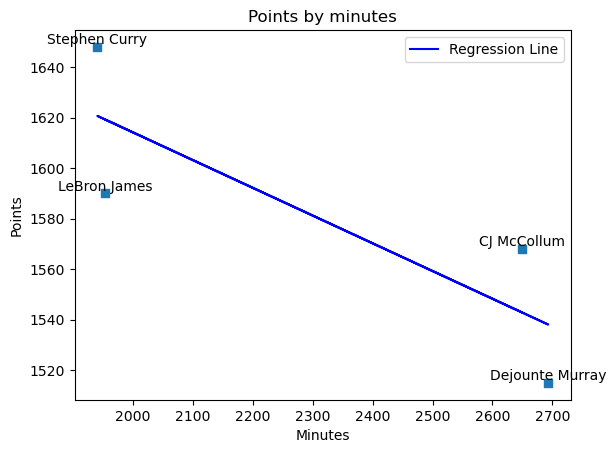

In [7]:
from math import sqrt
import requests
import matplotlib.pyplot as plt
import numpy as  np

website = requests.get("https://stats.nba.com/stats/leagueLeaders?LeagueID=00&PerMode=Totals&Scope=S&Season=2022-23&SeasonType=Regular+Season&StatCategory=PTS")
data = website.json()

players = data['resultSet']['rowSet']

player_name = input("Enter the player's name: ").lower()

player = None
for i in players:
    if i[2].lower() == player_name:
        player = i
        break

if player is not None:
    player_name = player[2]
    team = player[4]
    points = player[24]
    assists = player[19]
    rebounds = player[18]
    minutes = player[6]
    
    print("Selected Player:")
    print(f"Player: {player_name}")
    print(f"Team: {team}")
    print(f"Points: {points}")
    print(f"Assists: {assists}")
    print(f"Rebounds: {rebounds}")
    print()

    similar_players = []

    for other_player in players:
        other_points = other_player[24]
        other_assists = other_player[19]
        other_rebounds = other_player[18]
        other_minutes = other_player[6]
        
        difference = int(sqrt((points - other_points)**2 + (assists - other_assists)**2 + abs(rebounds - other_rebounds)**2))

        if other_player != player:
            similar_players.append({
                "name": other_player[2],
                "team": other_player[4],
                "points": other_points,
                "assists": other_assists,
                "rebounds": other_rebounds,
                'difference': difference,
                'minutes': other_minutes
            })

    similar_players.sort(key=lambda x: x["difference"])

    graph_minutes = [minutes]
    graph_points = [points]
    graph_name = [player_name]
    
    print("Top 3 Similar Players:")
    for i, similar_player in enumerate(similar_players[:3], 1):
        print(f"Player {i}:")
        print(f"Name: {similar_player['name']}")
        print(f"Team: {similar_player['team']}")
        print(f"Points: {similar_player['points']}")
        print(f"Assists: {similar_player['assists']}")
        print(f"Rebounds: {similar_player['rebounds']}")
        print(f"Difference: {similar_player['difference']}")
        print()
        
        graph_minutes.append(similar_player['minutes'])
        graph_points.append(similar_player['points'])
        graph_name.append(similar_player['name'])
        
        
    slope, intercept = np.polyfit(graph_minutes, graph_points, 1)
    regression_line = np.polyval([slope, intercept], graph_minutes)
    
    plt.plot(graph_minutes, regression_line, color='blue', label='Regression Line')
    
    plt.scatter(graph_minutes, graph_points, marker = 's')  
    plt.xlabel("Minutes")  
    plt.ylabel("Points")  
    plt.title("Points by minutes")
       
    for x, y, name in zip(graph_minutes, graph_points, graph_name):
        plt.text(x, y, name, ha='center', va='bottom')

    plt.legend()
    plt.show()
    
else:
    print("Invalid player name.")